In [34]:
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('/content/Evaluation-dataset.csv')
df.head()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.columns = [f"col{i}" for i in range(len(df.columns))]
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
def remove_empty(text):
    return [label for label in text if label != '']

def remove_space(text):
    return [label.strip() for label in text]


columns = df.columns
labels = columns[1:]



In [38]:
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df = df.fillna('')
# df.replace('',np.nan, inplace=True)
df['target'] = df[labels].values.tolist()
df['target'] = df['target'].map(remove_empty)
df['target'] = df['target'].map(remove_space)
df =  df[['col0','target']]
print(df.head())
df["count"] = df["target"].apply(lambda label: len(label))

                                                col0  \
0  Easy Tyre Selection Process, Competitive Prici...   
1         Very easy to use and good value for money.   
2              Really easy and convenient to arrange   
3  It was so easy to select tyre sizes and arrang...   
4  service was excellent. Only slight downside wa...   

                                              target  
0  [garage service positive, value for money posi...  
1                         [value for money positive]  
2                         [ease of booking positive]  
3  [location positive, value for money positive, ...  
4  [length of fitting positive, ease of booking p...  


In [40]:
df.head()

,col0,target,count
0,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2
1,Very easy to use and good value for money.,[value for money positive],1
2,Really easy and convenient to arrange,[ease of booking positive],1
3,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3
4,service was excellent. Only slight downside wa...,"[length of fitting positive, ease of booking p...",3


count    10131.000000
mean         1.435495
std          1.123323
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: count, dtype: float64


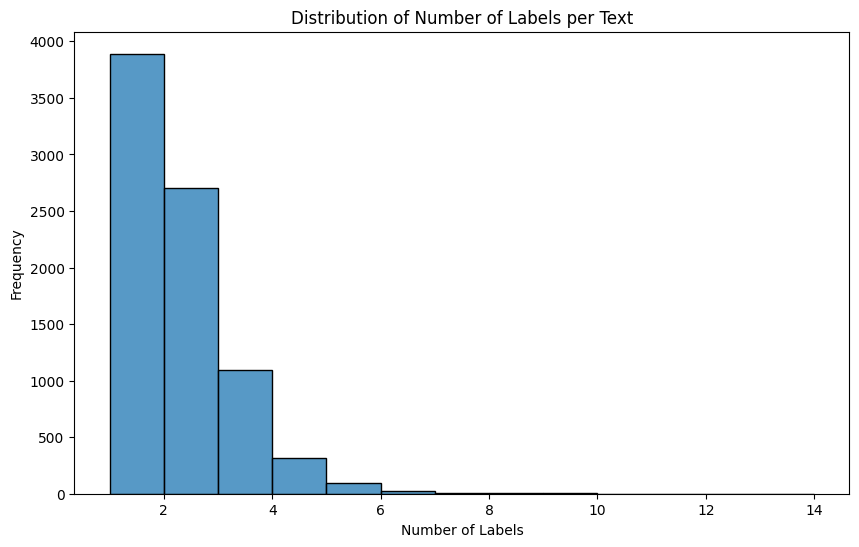

In [41]:
# Print summary statistics
print(df['count'].describe())

# Plot the distribution of the number of labels per text
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], bins=range(1, df['count'].max() + 1), kde=False)
plt.xlabel('Number of Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Labels per Text')
plt.show()
label_freq = Counter(label for labels in df['target'] for label in labels)
labels, counts = zip(*label_freq.items())

<ipython-input-42-aee0418e1f10>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_labels.values()), y=list(top_labels.keys()), palette='viridis')


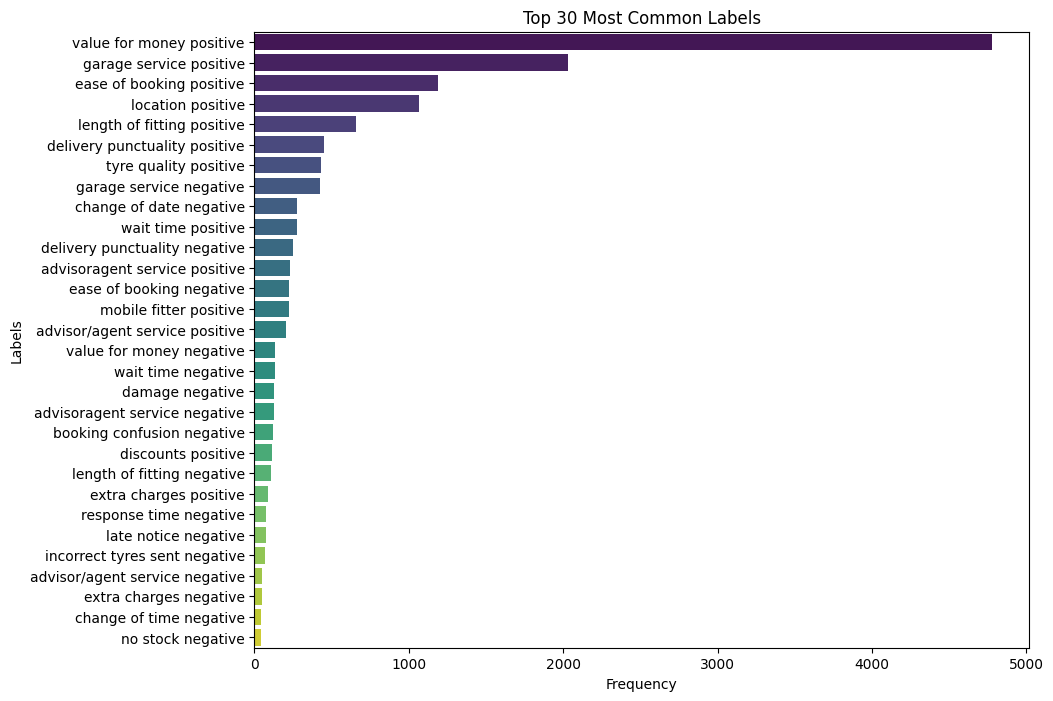

In [42]:

num_top_labels = 30
top_labels = dict(label_freq.most_common(num_top_labels))

# Plot the top labels
plt.figure(figsize=(10, 8))
sns.barplot(x=list(top_labels.values()), y=list(top_labels.keys()), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.title(f'Top {num_top_labels} Most Common Labels')
plt.show()


In [43]:
label_freq

Counter({'garage service positive': 2030,
         'value for money positive': 4780,
         'ease of booking positive': 1186,
         'location positive': 1063,
         'length of fitting positive': 657,
         'ease of booking negative': 227,
         'change of date negative': 277,
         'tyre quality positive': 434,
         'garage service negative': 423,
         'wait time negative': 135,
         'delivery punctuality positive': 453,
         'mobile fitter positive': 225,
         'advisor/agent service positive': 202,
         'advisoragent service positive': 233,
         'wait time positive': 274,
         'extra charges positive': 85,
         'length of fitting negative': 109,
         'location negative': 27,
         'value for money negative': 136,
         'damage negative': 127,
         'mobile fitter negative': 28,
         'balancing positive': 14,
         'facilities positive': 33,
         'change of time negative': 42,
         'extra charges negative'

In [44]:
df['count'].value_counts()

count
1     3890
2     2700
0     2003
3     1093
4      316
5       93
6       23
7        5
8        5
9        2
14       1
Name: count, dtype: int64

In [45]:
df.target.explode().unique()

array(['garage service positive', 'value for money positive',
       'ease of booking positive', 'location positive',
       'length of fitting positive', 'ease of booking negative',
       'change of date negative', 'tyre quality positive',
       'garage service negative', 'wait time negative',
       'delivery punctuality positive', 'mobile fitter positive',
       'advisor/agent service positive', 'advisoragent service positive',
       'wait time positive', 'extra charges positive',
       'length of fitting negative', 'location negative',
       'value for money negative', 'damage negative',
       'mobile fitter negative', 'balancing positive',
       'facilities positive', nan, 'change of time negative',
       'extra charges negative', 'booking confusion negative',
       'late notice negative', 'delivery punctuality negative',
       'discounts positive', 'tyre quality negative',
       'change of date positive', 'refund not actioned positive',
       'refund timescale positi

In [46]:
label_freq_dict = dict(label_freq.items())
type(label_freq_dict)

dict

In [47]:
label_dict = dict(sorted(label_freq_dict.items(), key=lambda item: item[1], reverse=True))
print(label_dict)
print(len(label_dict))

{'value for money positive': 4780, 'garage service positive': 2030, 'ease of booking positive': 1186, 'location positive': 1063, 'length of fitting positive': 657, 'delivery punctuality positive': 453, 'tyre quality positive': 434, 'garage service negative': 423, 'change of date negative': 277, 'wait time positive': 274, 'delivery punctuality negative': 250, 'advisoragent service positive': 233, 'ease of booking negative': 227, 'mobile fitter positive': 225, 'advisor/agent service positive': 202, 'value for money negative': 136, 'wait time negative': 135, 'damage negative': 127, 'advisoragent service negative': 125, 'booking confusion negative': 119, 'discounts positive': 115, 'length of fitting negative': 109, 'extra charges positive': 85, 'response time negative': 77, 'late notice negative': 76, 'incorrect tyres sent negative': 70, 'advisor/agent service negative': 47, 'extra charges negative': 46, 'change of time negative': 42, 'no stock negative': 42, 'tyre quality negative': 40, '

In [48]:
relevant_subtheme=[]
for key,value in label_dict.items():
  if value>=5:
    relevant_subtheme.append(key)

print(relevant_subtheme)
print(len(relevant_subtheme))

['value for money positive', 'garage service positive', 'ease of booking positive', 'location positive', 'length of fitting positive', 'delivery punctuality positive', 'tyre quality positive', 'garage service negative', 'change of date negative', 'wait time positive', 'delivery punctuality negative', 'advisoragent service positive', 'ease of booking negative', 'mobile fitter positive', 'advisor/agent service positive', 'value for money negative', 'wait time negative', 'damage negative', 'advisoragent service negative', 'booking confusion negative', 'discounts positive', 'length of fitting negative', 'extra charges positive', 'response time negative', 'late notice negative', 'incorrect tyres sent negative', 'advisor/agent service negative', 'extra charges negative', 'change of time negative', 'no stock negative', 'tyre quality negative', 'response time positive', 'facilities positive', 'mobile fitter negative', 'refund positive', 'discounts negative', 'location negative', 'refund negati

In [49]:
for subtheme in relevant_subtheme:
    df[subtheme] = df['target'].apply(lambda labels: 1 if subtheme in labels else 0)

# Display the first few rows of the modified DataFrame
temp_df = df
df.drop(columns=['target', 'count'], inplace=True)
df.head()


,col0,value for money positive,garage service positive,ease of booking positive,location positive,length of fitting positive,delivery punctuality positive,tyre quality positive,garage service negative,change of date negative,...,facilities negative,balancing positive,refund not actioned negative,mobile fitter didn't arrive negative,refund timescale negative,discount not applied negative,tyre age/dot code negative,tyre agedot code negative,refund timescale positive,failed payment negative
0,"Easy Tyre Selection Process, Competitive Prici...",1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Very easy to use and good value for money.,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Really easy and convenient to arrange,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,It was so easy to select tyre sizes and arrang...,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,service was excellent. Only slight downside wa...,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df.rename(columns={'col0': 'sentence'}, inplace=True)

In [51]:
sentence = df['sentence'].values.tolist()
sentence

['Easy Tyre Selection Process, Competitive Pricing and Excellent Fitting Service',
 'Very easy to use and good value for money.',
 'Really easy and convenient to arrange',
 'It was so easy to select tyre sizes and arrange local fitting. The prices were competitive',
 "service was excellent. Only slight downside was not knowing exact time at garage although the garage were so quick so I wasn't delayed",
 'User friendly Website. Competitive Prices. Good communications. Efficient service by ATS Euromaster.',
 'Excellent prices and service',
 "It was very straightforward and the garage was great. Hadn't even known about them before",
 'Use of local garage.',
 'Easy to use, also good price.',
 'Outstanding values for money and a friendly professional service',
 'Great price and easy to use',
 'Good price and easy to use a garage I was familiar with.',
 "Booked slot then you couldn't provide it and had to re-arrange. Makes a bit of a mockery of an online booking system...",
 'Good price and 

In [52]:
def convert_lower(text):
  return text.lower()

df['sentence'] = df['sentence'].apply(convert_lower)
sentence = df['sentence']
print(sentence)

0        easy tyre selection process, competitive prici...
1               very easy to use and good value for money.
2                    really easy and convenient to arrange
3        it was so easy to select tyre sizes and arrang...
4        service was excellent. only slight downside wa...
                               ...                        
10126    i ordered the wrong tyres, however [redacted] ...
10127    good experience, first time i have used [redac...
10128    i ordered the tyre i needed on line, booked a ...
10129    excellent service from point of order to fitti...
10130    seamless, well managed at both ends. i would r...
Name: sentence, Length: 10131, dtype: object


In [53]:
def remove_special_char(text):
  return re.sub(r'[^\w\s]', '', text)

df['sentence'] = df['sentence'].apply(remove_special_char)
sentence = df['sentence'].values.tolist()
sentence

['easy tyre selection process competitive pricing and excellent fitting service',
 'very easy to use and good value for money',
 'really easy and convenient to arrange',
 'it was so easy to select tyre sizes and arrange local fitting the prices were competitive',
 'service was excellent only slight downside was not knowing exact time at garage although the garage were so quick so i wasnt delayed',
 'user friendly website competitive prices good communications efficient service by ats euromaster',
 'excellent prices and service',
 'it was very straightforward and the garage was great hadnt even known about them before',
 'use of local garage',
 'easy to use also good price',
 'outstanding values for money and a friendly professional service',
 'great price and easy to use',
 'good price and easy to use a garage i was familiar with',
 'booked slot then you couldnt provide it and had to rearrange makes a bit of a mockery of an online booking system',
 'good price and some good fitting cen

In [54]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

def remove_stopwords(text):
  x=[]
  for i in text.split():
    if i not in stopwords.words('english'):
      x.append(i)
  return ' '.join(x)

df['sentence'] = df['sentence'].apply(remove_stopwords)
sentence = df['sentence'].values.tolist()
sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['easy tyre selection process competitive pricing excellent fitting service',
 'easy use good value money',
 'really easy convenient arrange',
 'easy select tyre sizes arrange local fitting prices competitive',
 'service excellent slight downside knowing exact time garage although garage quick wasnt delayed',
 'user friendly website competitive prices good communications efficient service ats euromaster',
 'excellent prices service',
 'straightforward garage great hadnt even known',
 'use local garage',
 'easy use also good price',
 'outstanding values money friendly professional service',
 'great price easy use',
 'good price easy use garage familiar',
 'booked slot couldnt provide rearrange makes bit mockery online booking system',
 'good price good fitting centres',
 'competitively priced easy use fitting centre near professional',
 'easy use kept date every step way good product good price thank',
 'really easy website navigate competitive prices great selection garages choose fitt

In [55]:
df['sentence']

0        easy tyre selection process competitive pricin...
1                                easy use good value money
2                           really easy convenient arrange
3        easy select tyre sizes arrange local fitting p...
4        service excellent slight downside knowing exac...
                               ...                        
10126    ordered wrong tyres however redacted arranged ...
10127    good experience first time used redacted harbo...
10128    ordered tyre needed line booked specified time...
10129    excellent service point order fitting complain...
10130           seamless well managed ends would recommend
Name: sentence, Length: 10131, dtype: object

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

y=[]
def stem_words(text):
  for i in text.split():
    y.append(ps.stem(i))
  z=y[:]
  y.clear()
  return z

df['sentence'] = df['sentence'].apply(stem_words)
sentence = df['sentence'].values.tolist()
sentence

[['easi',
  'tyre',
  'select',
  'process',
  'competit',
  'price',
  'excel',
  'fit',
  'servic'],
 ['easi', 'use', 'good', 'valu', 'money'],
 ['realli', 'easi', 'conveni', 'arrang'],
 ['easi',
  'select',
  'tyre',
  'size',
  'arrang',
  'local',
  'fit',
  'price',
  'competit'],
 ['servic',
  'excel',
  'slight',
  'downsid',
  'know',
  'exact',
  'time',
  'garag',
  'although',
  'garag',
  'quick',
  'wasnt',
  'delay'],
 ['user',
  'friendli',
  'websit',
  'competit',
  'price',
  'good',
  'commun',
  'effici',
  'servic',
  'at',
  'euromast'],
 ['excel', 'price', 'servic'],
 ['straightforward', 'garag', 'great', 'hadnt', 'even', 'known'],
 ['use', 'local', 'garag'],
 ['easi', 'use', 'also', 'good', 'price'],
 ['outstand', 'valu', 'money', 'friendli', 'profession', 'servic'],
 ['great', 'price', 'easi', 'use'],
 ['good', 'price', 'easi', 'use', 'garag', 'familiar'],
 ['book',
  'slot',
  'couldnt',
  'provid',
  'rearrang',
  'make',
  'bit',
  'mockeri',
  'onlin',
  '

In [57]:
def join_back(list_input):
  return ' '.join(list_input)

df['sentence'] = df['sentence'].apply(join_back)
sentence = df['sentence'].values.tolist()
sentence

['easi tyre select process competit price excel fit servic',
 'easi use good valu money',
 'realli easi conveni arrang',
 'easi select tyre size arrang local fit price competit',
 'servic excel slight downsid know exact time garag although garag quick wasnt delay',
 'user friendli websit competit price good commun effici servic at euromast',
 'excel price servic',
 'straightforward garag great hadnt even known',
 'use local garag',
 'easi use also good price',
 'outstand valu money friendli profession servic',
 'great price easi use',
 'good price easi use garag familiar',
 'book slot couldnt provid rearrang make bit mockeri onlin book system',
 'good price good fit centr',
 'competit price easi use fit centr near profession',
 'easi use kept date everi step way good product good price thank',
 'realli easi websit navig competit price great select garag choos fit',
 'good experi set time book',
 'hassl fuss good price',
 'good price good fit servic at cleckheaton',
 'quick simpl websit

In [58]:
def remove_digit(text):
  return re.sub(r'\d+', '', text)

df['sentence'] = df['sentence'].apply(remove_digit)
sentence = df['sentence'].values.tolist()
sentence

['easi tyre select process competit price excel fit servic',
 'easi use good valu money',
 'realli easi conveni arrang',
 'easi select tyre size arrang local fit price competit',
 'servic excel slight downsid know exact time garag although garag quick wasnt delay',
 'user friendli websit competit price good commun effici servic at euromast',
 'excel price servic',
 'straightforward garag great hadnt even known',
 'use local garag',
 'easi use also good price',
 'outstand valu money friendli profession servic',
 'great price easi use',
 'good price easi use garag familiar',
 'book slot couldnt provid rearrang make bit mockeri onlin book system',
 'good price good fit centr',
 'competit price easi use fit centr near profession',
 'easi use kept date everi step way good product good price thank',
 'realli easi websit navig competit price great select garag choos fit',
 'good experi set time book',
 'hassl fuss good price',
 'good price good fit servic at cleckheaton',
 'quick simpl websit

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['sentence']).toarray()
y=df.drop(columns=['sentence'])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8104, 6004)
(2027, 6004)
(8104, 51)
(2027, 51)


In [62]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Results storage
results = {}

# Train and evaluate models
for name, clf in classifiers.items():
    print(f"Training {name}...")
    if name in ['MultinomialNB', 'BernoulliNB']:
        # Use OneVsRestClassifier for MultinomialNB and BernoulliNB
        model = OneVsRestClassifier(clf)
        model.fit(X_train, y_train)
    elif name == 'GaussianNB':
        # GaussianNB requires dense input
        model = OneVsRestClassifier(clf)
        model.fit(X_train, y_train)
    else:
        # RandomForestClassifier
        model = clf
        model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = {'accuracy': accuracy, 'f1_score': f1}
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

# Display results
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.4f}, F1 Score = {metrics['f1_score']:.4f}")

Training MultinomialNB...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


MultinomialNB - Accuracy: 0.3236, F1 Score: 0.1002
Training GaussianNB...
GaussianNB - Accuracy: 0.0178, F1 Score: 0.0413
Training BernoulliNB...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


BernoulliNB - Accuracy: 0.3468, F1 Score: 0.0936
Training RandomForest...
RandomForest - Accuracy: 0.4558, F1 Score: 0.0647
MultinomialNB: Accuracy = 0.3236, F1 Score = 0.1002
GaussianNB: Accuracy = 0.0178, F1 Score = 0.0413
BernoulliNB: Accuracy = 0.3468, F1 Score = 0.0936
RandomForest: Accuracy = 0.4558, F1 Score = 0.0647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [63]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    tree = "hits",
    cud ="device",
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Wrap XGBoost with MultiOutputClassifier for multilabel classification
model = MultiOutputClassifier(xgb_model, n_jobs=-1)

# Train the model
print("Training XGBoost...")
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
hamming = hamming_loss(y_test, y_pred)

# Print results
print(f"XGBoost - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Hamming Loss: {hamming:.4f}")

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


XGBoost - Accuracy: 0.5106, F1 Score: 0.2826, Hamming Loss: 0.0156


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
import numpy as np

sentences = df['sentence'].tolist()
labels = df.drop(columns=['sentence']).values

# Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences
max_length = 128
X = pad_sequences(sequences, maxlen=max_length, padding='post')
y = labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(y_train.shape[1], activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict
y_pred = model.predict(X_test)

# Binarize predictions
y_pred_binarized = (y_pred > 0.5).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_binarized)
f1 = f1_score(y_test, y_pred_binarized, average='macro')
hamming = hamming_loss(y_test, y_pred_binarized)

print(f"RNN - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Hamming Loss: {hamming:.4f}")

Epoch 1/10
203/203 [==============================] - 44s 187ms/step - loss: 0.1362 - accuracy: 0.6076 - val_loss: 0.0896 - val_accuracy: 0.6749
Epoch 2/10
203/203 [==============================] - 40s 195ms/step - loss: 0.0824 - accuracy: 0.6718 - val_loss: 0.0789 - val_accuracy: 0.6675
Epoch 3/10
203/203 [==============================] - 38s 187ms/step - loss: 0.0707 - accuracy: 0.6235 - val_loss: 0.0690 - val_accuracy: 0.5768
Epoch 4/10
203/203 [==============================] - 41s 202ms/step - loss: 0.0646 - accuracy: 0.6335 - val_loss: 0.0662 - val_accuracy: 0.6274
Epoch 5/10
203/203 [==============================] - 36s 175ms/step - loss: 0.0605 - accuracy: 0.6499 - val_loss: 0.0635 - val_accuracy: 0.6502
Epoch 6/10
203/203 [==============================] - 37s 182ms/step - loss: 0.0561 - accuracy: 0.6801 - val_loss: 0.0613 - val_accuracy: 0.6397
Epoch 7/10
203/203 [==============================] - 38s 188ms/step - loss: 0.0518 - accuracy: 0.6835 - val_loss: 0.0596 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
